In [1]:
import numpy as np
import matplotlib.pyplot as plt

from xwp_rotation.rotate import pyvips_rotate
from xwp_rotation.rotate import rot_matrix

In [2]:
size = 128
angle = 20
rot_matrix_pos = rot_matrix(size,+angle)
rot_matrix_neg = rot_matrix(size,-angle)

In [3]:
print("%nnz for +ve rot : ", 100 * (np.count_nonzero(rot_matrix_pos)/(size**4)))
print("%nnz for -ve rot : ", 100 * (np.count_nonzero(rot_matrix_neg)/(size**4)))

%nnz for +ve rot :  0.06401613354682922
%nnz for -ve rot :  0.06401613354682922


In [4]:
a = np.zeros((size,size))
a[35,55] = 1

7.158004608467822e-05


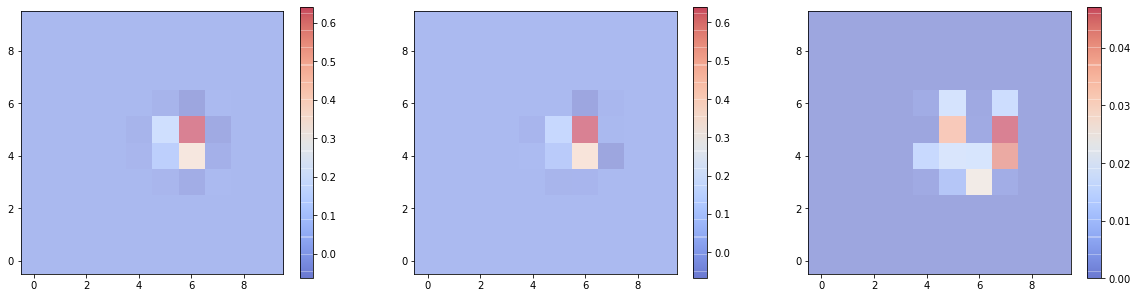

In [5]:
B = (rot_matrix_pos@a.ravel()).reshape((size,size))
diff_pos = np.abs(B - pyvips_rotate(a,+angle))

rx,ry = 35,45
cx,cy = 40,50

plt.rcParams["figure.figsize"] = (20,5)
f,(ax1,ax2,ax3) = plt.subplots(1,3)
im1 = ax1.imshow(B[rx:ry,cx:cy], alpha = 0.5, origin='lower', cmap='coolwarm')
im2 = ax2.imshow((pyvips_rotate(a,+angle))[rx:ry,cx:cy], alpha = 0.5, origin='lower', cmap='coolwarm')
im3 = ax3.imshow(diff_pos[rx:ry,cx:cy], alpha = 0.5, origin='lower', cmap='coolwarm')
f.colorbar(im1,ax=ax1)
f.colorbar(im2,ax=ax2)
f.colorbar(im3,ax=ax3)

print(np.sum((diff_pos[rx:ry,cx:cy].ravel()**2)/(10*10)))

7.817364461683681e-05


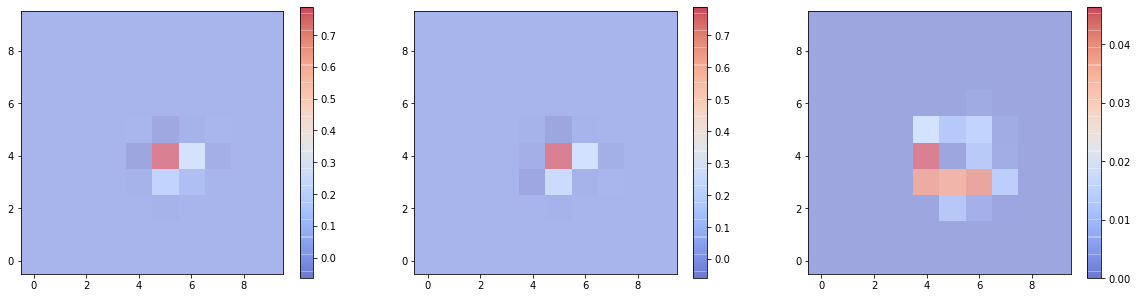

In [6]:
C = (rot_matrix_neg@(a.ravel())).reshape((size,size))
diff_neg = np.abs(C - pyvips_rotate(a,-angle))

rx,ry = 30,40
cx,cy = 60,70

plt.rcParams["figure.figsize"] = (20,5)
f,(ax1,ax2,ax3) = plt.subplots(1,3)
im1 = ax1.imshow(C[rx:ry,cx:cy], alpha = 0.5, origin='lower', cmap='coolwarm')
im2 = ax2.imshow((pyvips_rotate(a,-angle))[rx:ry,cx:cy], alpha = 0.5, origin='lower', cmap='coolwarm')
im3 = ax3.imshow(diff_neg[rx:ry,cx:cy], alpha = 0.5, origin='lower', cmap='coolwarm')
f.colorbar(im1,ax=ax1)
f.colorbar(im2,ax=ax2)
f.colorbar(im3,ax=ax3)

print(np.sum((diff_neg[rx:ry,cx:cy].ravel()**2)/(10*10)))